# **Alabama**

 Estadísticas descriptivas:

                   Low           Mid          High
count       136.000000    136.000000    136.000000
mean        379.433824    379.433824    379.433824
std         109.444639    109.444639    109.444639
min         173.000000    173.000000    173.000000
25%         300.000000    300.000000    300.000000
50%         380.000000    380.000000    380.000000
75%         430.500000    430.500000    430.500000
max         740.000000    740.000000    740.000000
range       567.000000    567.000000    567.000000
variance  11978.128922  11978.128922  11978.128922
mode        380.000000    380.000000    380.000000


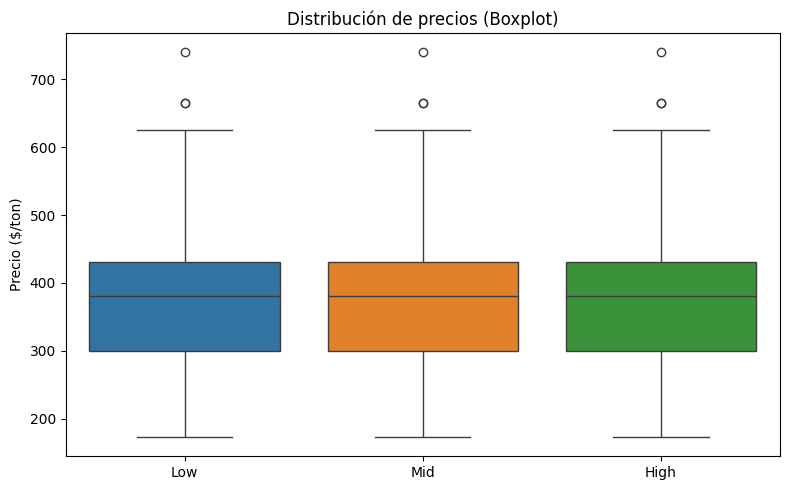

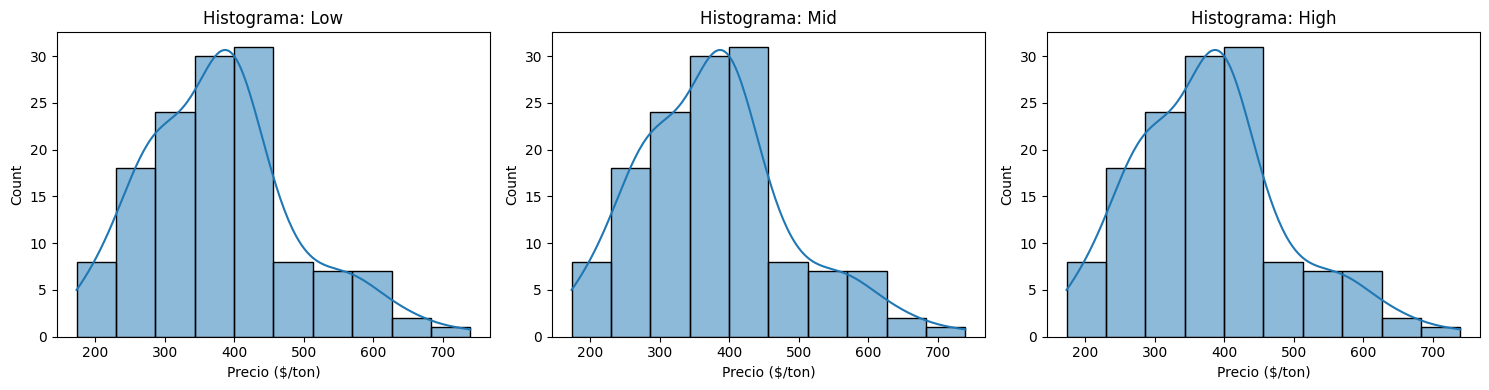

<ipython-input-22-fc9e7528f56b>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_data, x='Date', y='Mid Change %', palette='coolwarm')


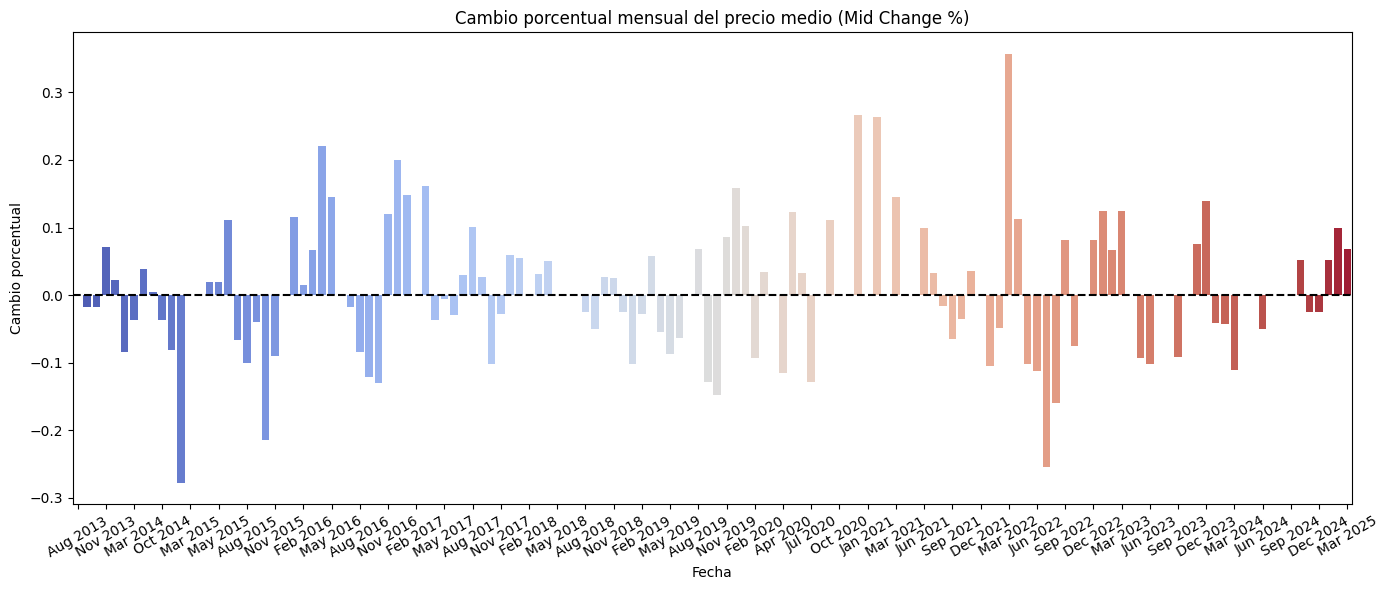

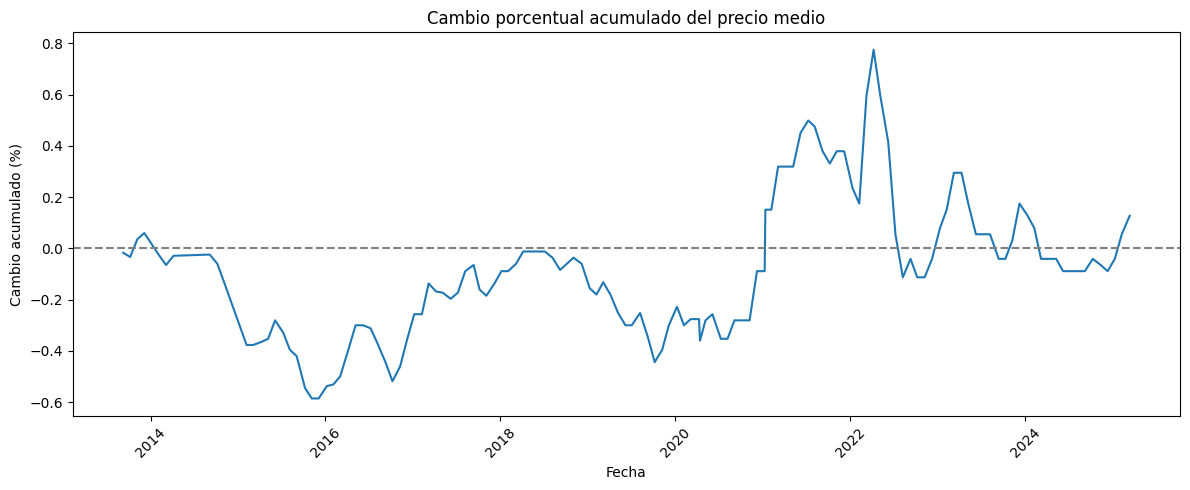


 Meses con cambio absoluto ≥ 10%:

          Date    Mid  Mid Change %
124 2015-02-06  260.0     -0.277778
119 2015-06-05  300.0      0.111111
117 2015-08-06  252.0     -0.100000
115 2015-10-08  190.0     -0.214876
112 2016-01-07  193.0      0.115607
109 2016-04-08  255.0      0.220096
108 2016-05-06  292.0      0.145098
104 2016-09-09  231.0     -0.121673
103 2016-10-07  201.0     -0.129870
102 2016-11-08  225.0      0.119403
101 2016-12-08  270.0      0.200000
100 2017-01-06  310.0      0.148148
98  2017-03-07  360.0      0.161290
93  2017-08-07  380.0      0.101449
91  2017-10-06  350.0     -0.102564
76  2019-01-09  352.0     -0.102041
68  2019-09-09  272.0     -0.128205
67  2019-10-07  232.0     -0.147059
65  2019-12-05  292.0      0.158730
64  2020-01-08  322.0      0.102740
60  2020-04-13  267.0     -0.115894
59  2020-05-06  300.0      0.123596
57  2020-07-09  270.0     -0.129032
55  2020-09-04  300.0      0.111111
52  2020-12-07  380.0      0.266667
50  2021-01-11  480.0      0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_excel("Busheling No1 Alabama.xlsx", header=10)

data_cleaned = data.drop(columns=['Unnamed: 5'])

# Conversión de columnas
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce', dayfirst=True)
data_cleaned['Low'] = pd.to_numeric(data_cleaned['Low'], errors='coerce')
data_cleaned['Mid'] = pd.to_numeric(data_cleaned['Mid'], errors='coerce')
data_cleaned['High'] = pd.to_numeric(data_cleaned['High'], errors='coerce')
data_cleaned['Mid Change %'] = pd.to_numeric(data_cleaned['Mid Change %'], errors='coerce')

# Filtrar solo datos válidos
filtered_data = data_cleaned.dropna(subset=['Low', 'Mid', 'High'])
filtered_data = filtered_data.sort_values('Date')

# PASO 2: Estadísticas descriptivas
stats = filtered_data[['Low', 'Mid', 'High']].describe()
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
stats.loc['variance'] = filtered_data[['Low', 'Mid', 'High']].var()
stats.loc['mode'] = filtered_data[['Low', 'Mid', 'High']].mode().iloc[0]

print(" Estadísticas descriptivas:\n")
print(stats)

# PASO 3: Boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data[['Low', 'Mid', 'High']])
plt.title('Distribución de precios (Boxplot)')
plt.ylabel('Precio ($/ton)')
plt.tight_layout()
plt.show()

# PASO 4: Histogramas
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Low', 'Mid', 'High']):
    plt.subplot(1, 3, i+1)
    sns.histplot(filtered_data[col], kde=True, bins=10)
    plt.title(f'Histograma: {col}')
    plt.xlabel('Precio ($/ton)')
plt.tight_layout()
plt.show()

# PASO 5: Cambio porcentual mensual
plt.figure(figsize=(14, 6))
sns.barplot(data=filtered_data, x='Date', y='Mid Change %', palette='coolwarm')
xticks = np.arange(0, len(filtered_data), step=3)
plt.xticks(ticks=xticks, labels=filtered_data['Date'].dt.strftime('%b %Y').iloc[xticks], rotation=30)
plt.axhline(0, color='black', linestyle='--')
plt.title('Cambio porcentual mensual del precio medio (Mid Change %)')
plt.xlabel('Fecha')
plt.ylabel('Cambio porcentual')
plt.tight_layout()
plt.show()

# PASO 6: Cambio acumulado
filtered_data['Cambio Acumulado %'] = (1 + filtered_data['Mid Change %']).cumprod() - 1
plt.figure(figsize=(12, 5))
sns.lineplot(data=filtered_data, x='Date', y='Cambio Acumulado %')
plt.title('Cambio porcentual acumulado del precio medio')
plt.xlabel('Fecha')
plt.ylabel('Cambio acumulado (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PASO 7: Tabla de cambios fuertes
cambios_fuertes = filtered_data[filtered_data['Mid Change %'].abs() >= 0.10]
print("\n Meses con cambio absoluto ≥ 10%:\n")
print(cambios_fuertes[['Date', 'Mid', 'Mid Change %']])


# **Chicago**

Estadísticas descriptivas (dataset 1):

                   Low           Mid          High
count       437.000000    437.000000    437.000000
mean        284.345538    284.399314    284.453089
std         147.846691    147.794959    147.743488
min          79.000000     79.000000     79.000000
25%         153.000000    153.000000    153.000000
50%         270.000000    270.000000    270.000000
75%         380.000000    380.000000    380.000000
max         890.000000    890.000000    890.000000
range       811.000000    811.000000    811.000000
variance  21858.644091  21843.349931  21828.138276
mode        380.000000    380.000000    380.000000


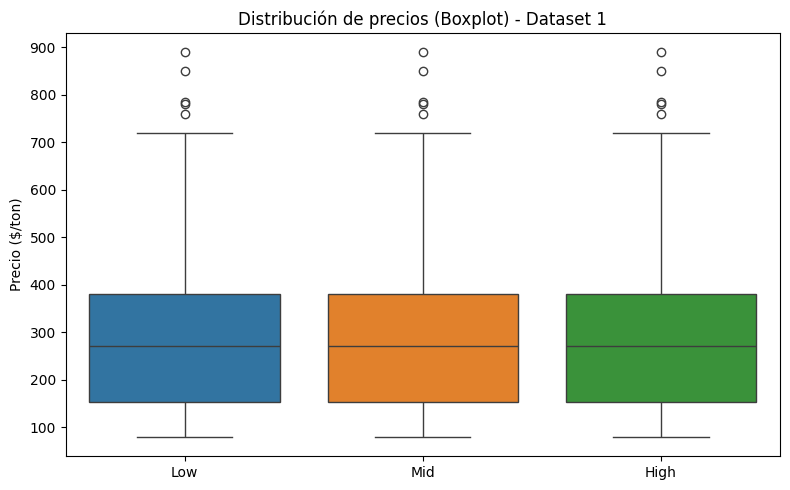

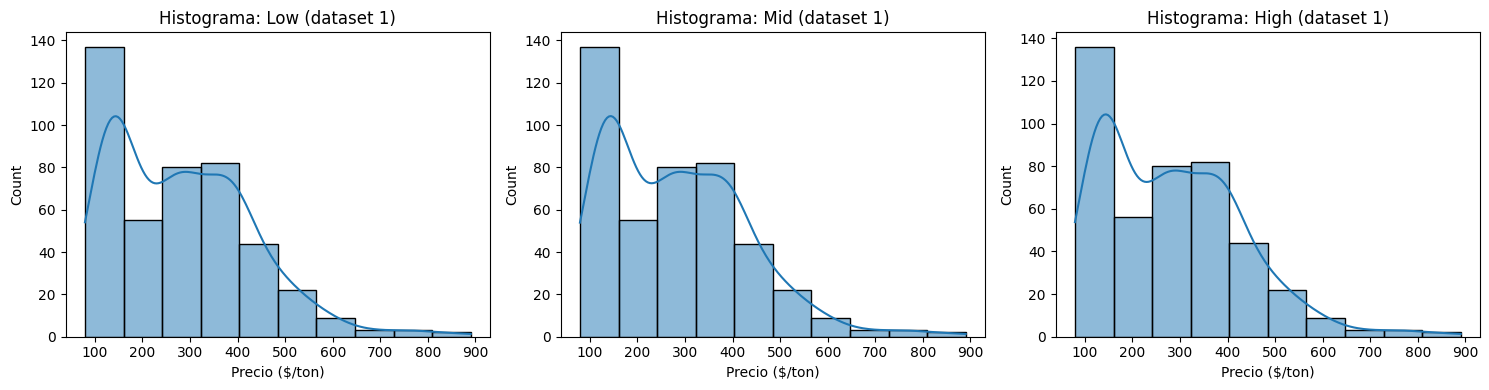

<ipython-input-23-18b15239aaa3>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=filtered_data_1, x='Date', y='Mid Change %', palette='coolwarm')


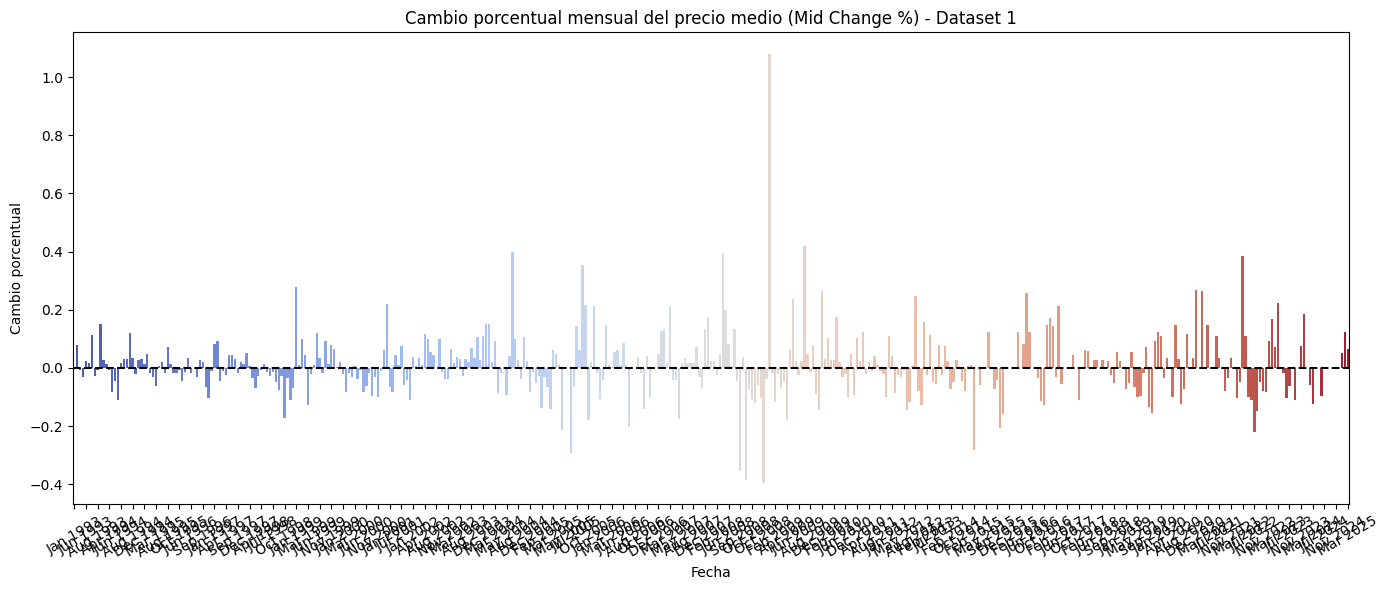

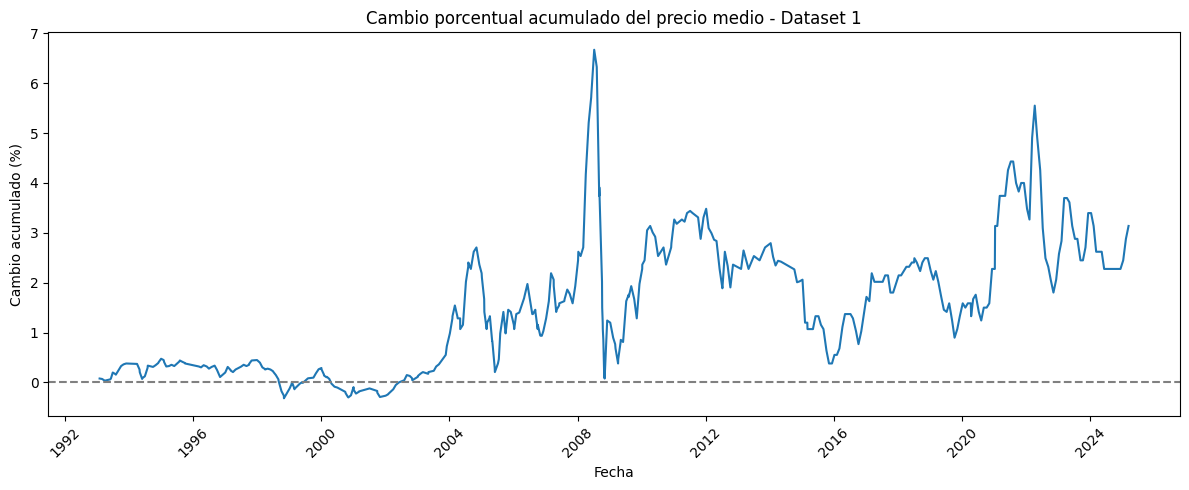


🔍 Meses con cambio absoluto ≥ 10% :

          Date    Mid  Mid Change %
430 1993-07-01  139.0      0.112000
427 1993-10-04  154.0      0.149254
421 1994-06-01  124.0     -0.111111
417 1994-08-02  150.0      0.119403
390 1996-11-01  130.0     -0.103448
..         ...    ...           ...
21  2023-06-09  480.0     -0.102804
18  2023-09-11  400.0     -0.111111
15  2023-12-08  510.0      0.186047
12  2024-03-08  420.0     -0.125000
1   2025-02-10  450.0      0.125000

[109 rows x 3 columns]


In [ ]:
# PASO 1: Cargar y preparar archivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leer desde la fila 10
data_1 = pd.read_excel("/content/Busheling No1 Chicago.xlsx", header=10)

# Eliminar columna vacía
data_cleaned_1 = data_1.drop(columns=['Unnamed: 5'])

# Conversión de columnas
data_cleaned_1['Date'] = pd.to_datetime(data_cleaned_1['Date'], errors='coerce', dayfirst=True)
data_cleaned_1['Low'] = pd.to_numeric(data_cleaned_1['Low'], errors='coerce')
data_cleaned_1['Mid'] = pd.to_numeric(data_cleaned_1['Mid'], errors='coerce')
data_cleaned_1['High'] = pd.to_numeric(data_cleaned_1['High'], errors='coerce')
data_cleaned_1['Mid Change %'] = pd.to_numeric(data_cleaned_1['Mid Change %'], errors='coerce')

# Filtrar solo datos válidos
filtered_data_1 = data_cleaned_1.dropna(subset=['Low', 'Mid', 'High'])
filtered_data_1 = filtered_data_1.sort_values('Date')

# PASO 2: Estadísticas descriptivas
stats_1 = filtered_data_1[['Low', 'Mid', 'High']].describe()
stats_1.loc['range'] = stats_1.loc['max'] - stats_1.loc['min']
stats_1.loc['variance'] = filtered_data_1[['Low', 'Mid', 'High']].var()
stats_1.loc['mode'] = filtered_data_1[['Low', 'Mid', 'High']].mode().iloc[0]

print("Estadísticas descriptivas (dataset 1):\n")
print(stats_1)

# PASO 3: Boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data_1[['Low', 'Mid', 'High']])
plt.title('Distribución de precios (Boxplot) - Dataset 1')
plt.ylabel('Precio ($/ton)')
plt.tight_layout()
plt.show()

# PASO 4: Histogramas
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Low', 'Mid', 'High']):
    plt.subplot(1, 3, i+1)
    sns.histplot(filtered_data_1[col], kde=True, bins=10)
    plt.title(f'Histograma: {col} (dataset 1)')
    plt.xlabel('Precio ($/ton)')
plt.tight_layout()
plt.show()

# PASO 5:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=filtered_data_1, x='Date', y='Mid Change %', palette='coolwarm')

xticks_idx = np.arange(0, len(filtered_data_1), step=4)
xtick_labels = filtered_data_1['Date'].dt.strftime('%b %Y').iloc[xticks_idx]

ax.set_xticks(xticks_idx)
ax.set_xticklabels(xtick_labels, rotation=30)

plt.axhline(0, color='black', linestyle='--')
plt.title('Cambio porcentual mensual del precio medio (Mid Change %) - Dataset 1')
plt.xlabel('Fecha')
plt.ylabel('Cambio porcentual')
plt.tight_layout()
plt.show()


# PASO 6: Cambio acumulado
filtered_data_1['Cambio Acumulado %'] = (1 + filtered_data_1['Mid Change %']).cumprod() - 1
plt.figure(figsize=(12, 5))
sns.lineplot(data=filtered_data_1, x='Date', y='Cambio Acumulado %')
plt.title('Cambio porcentual acumulado del precio medio - Dataset 1')
plt.xlabel('Fecha')
plt.ylabel('Cambio acumulado (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PASO 7: Tabla de cambios fuertes
cambios_fuertes_1 = filtered_data_1[filtered_data_1['Mid Change %'].abs() >= 0.10]
print("\n🔍 Meses con cambio absoluto ≥ 10% :\n")
print(cambios_fuertes_1[['Date', 'Mid', 'Mid Change %']])


# **Monterrey**

 Estadísticas descriptivas (dataset 2):

                   Low           Mid          High
count     4.590000e+02  4.590000e+02  4.590000e+02
mean      7.081954e+03  7.081954e+03  7.081954e+03
std       2.228117e+03  2.228117e+03  2.228117e+03
min       3.900000e+03  3.900000e+03  3.900000e+03
25%       5.500000e+03  5.500000e+03  5.500000e+03
50%       6.400000e+03  6.400000e+03  6.400000e+03
75%       8.000000e+03  8.000000e+03  8.000000e+03
max       1.365000e+04  1.365000e+04  1.365000e+04
range     9.750000e+03  9.750000e+03  9.750000e+03
variance  4.964505e+06  4.964505e+06  4.964505e+06
mode      6.200000e+03  6.200000e+03  6.200000e+03


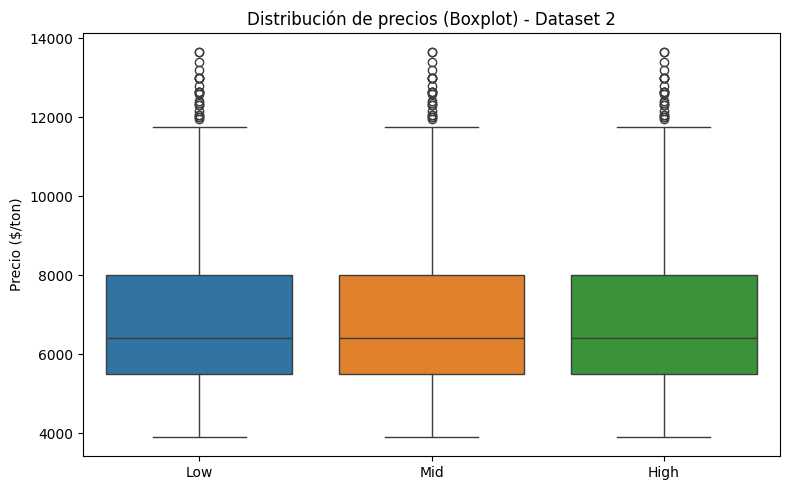

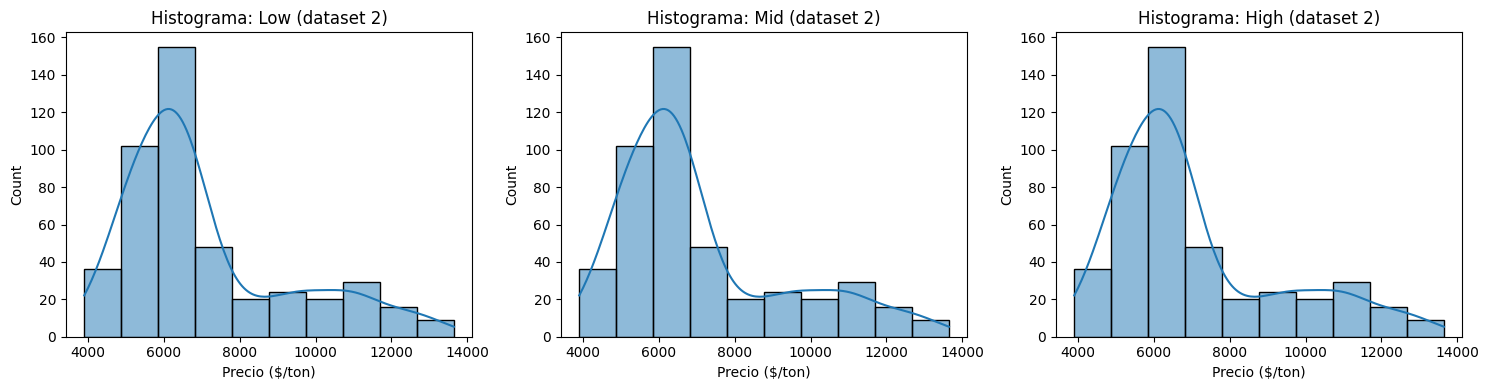

<ipython-input-24-353b9297285c>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=filtered_data_2, x='Date', y='Mid Change %', palette='coolwarm')


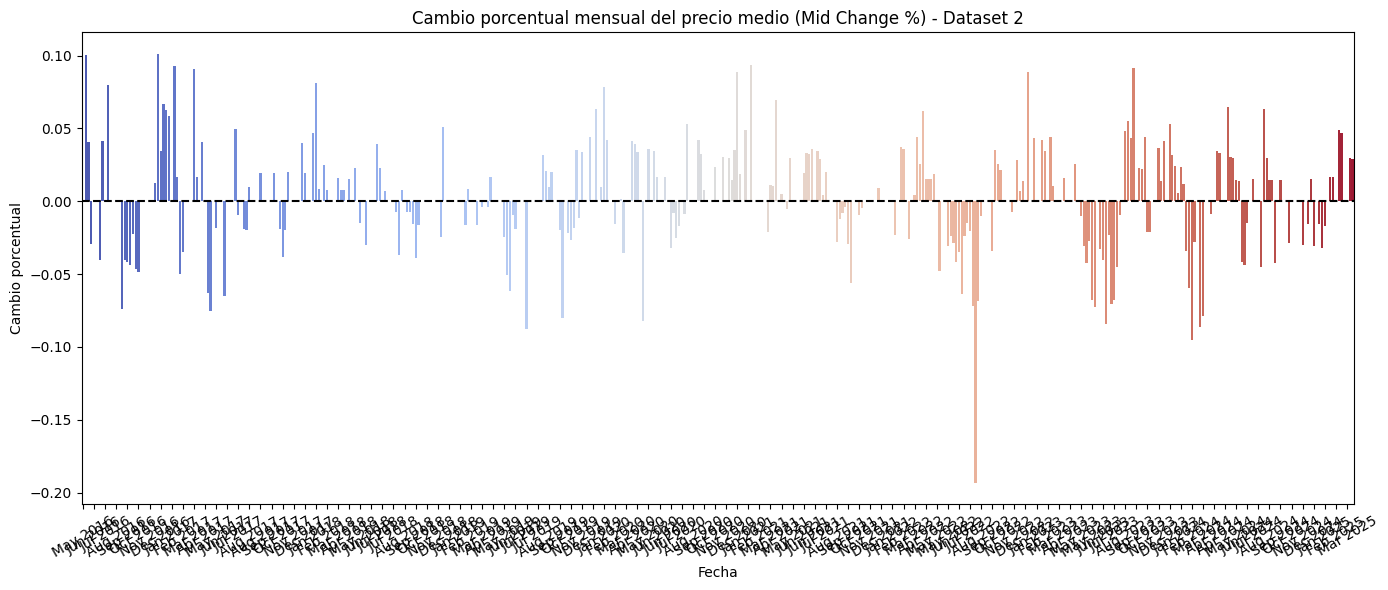

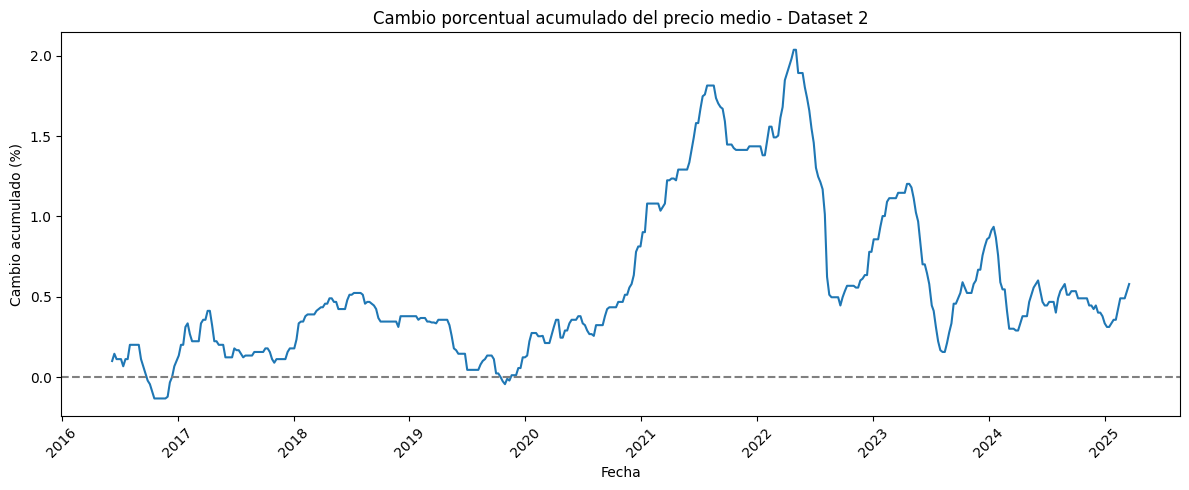


 Meses con cambio absoluto ≥ 10% :

          Date     Mid  Mid Change %
457 2016-06-08  4947.0      0.100556
431 2016-12-07  4350.0      0.101266
136 2022-08-09  7300.0     -0.193370


In [ ]:
# PASO 1: Cargar y preparar archivo 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leer desde la fila 10
data_2 = pd.read_excel("/content/COPYOF~1.XLS", header=10)

# Eliminar columna vacía
data_cleaned_2 = data_2

# Conversión de columnas
data_cleaned_2['Date'] = pd.to_datetime(data_cleaned_2['Date'], errors='coerce', dayfirst=True)
data_cleaned_2['Low'] = pd.to_numeric(data_cleaned_2['Low'], errors='coerce')
data_cleaned_2['Mid'] = pd.to_numeric(data_cleaned_2['Mid'], errors='coerce')
data_cleaned_2['High'] = pd.to_numeric(data_cleaned_2['High'], errors='coerce')
data_cleaned_2['Mid Change %'] = pd.to_numeric(data_cleaned_2['Mid Change %'], errors='coerce')

# Filtrar datos válidos
filtered_data_2 = data_cleaned_2.dropna(subset=['Low', 'Mid', 'High'])
filtered_data_2 = filtered_data_2.sort_values('Date')

# PASO 2: Estadísticas descriptivas
stats_2 = filtered_data_2[['Low', 'Mid', 'High']].describe()
stats_2.loc['range'] = stats_2.loc['max'] - stats_2.loc['min']
stats_2.loc['variance'] = filtered_data_2[['Low', 'Mid', 'High']].var()
stats_2.loc['mode'] = filtered_data_2[['Low', 'Mid', 'High']].mode().iloc[0]

print(" Estadísticas descriptivas (dataset 2):\n")
print(stats_2)

# PASO 3: Boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data_2[['Low', 'Mid', 'High']])
plt.title('Distribución de precios (Boxplot) - Dataset 2')
plt.ylabel('Precio ($/ton)')
plt.tight_layout()
plt.show()

# PASO 4: Histogramas
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Low', 'Mid', 'High']):
    plt.subplot(1, 3, i+1)
    sns.histplot(filtered_data_2[col], kde=True, bins=10)
    plt.title(f'Histograma: {col} (dataset 2)')
    plt.xlabel('Precio ($/ton)')
plt.tight_layout()
plt.show()

# PASO 5: Cambio porcentual mensual con eje X legible
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=filtered_data_2, x='Date', y='Mid Change %', palette='coolwarm')

xticks_idx = np.arange(0, len(filtered_data_2), step=4)
xtick_labels = filtered_data_2['Date'].dt.strftime('%b %Y').iloc[xticks_idx]

ax.set_xticks(xticks_idx)
ax.set_xticklabels(xtick_labels, rotation=30)

plt.axhline(0, color='black', linestyle='--')
plt.title('Cambio porcentual mensual del precio medio (Mid Change %) - Dataset 2')
plt.xlabel('Fecha')
plt.ylabel('Cambio porcentual')
plt.tight_layout()
plt.show()

# PASO 6: Cambio acumulado
filtered_data_2['Cambio Acumulado %'] = (1 + filtered_data_2['Mid Change %']).cumprod() - 1
plt.figure(figsize=(12, 5))
sns.lineplot(data=filtered_data_2, x='Date', y='Cambio Acumulado %')
plt.title('Cambio porcentual acumulado del precio medio - Dataset 2')
plt.xlabel('Fecha')
plt.ylabel('Cambio acumulado (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PASO 7: Tabla de cambios fuertes
cambios_fuertes_2 = filtered_data_2[filtered_data_2['Mid Change %'].abs() >= 0.10]
print("\n Meses con cambio absoluto ≥ 10% :\n")
print(cambios_fuertes_2[['Date', 'Mid', 'Mid Change %']])



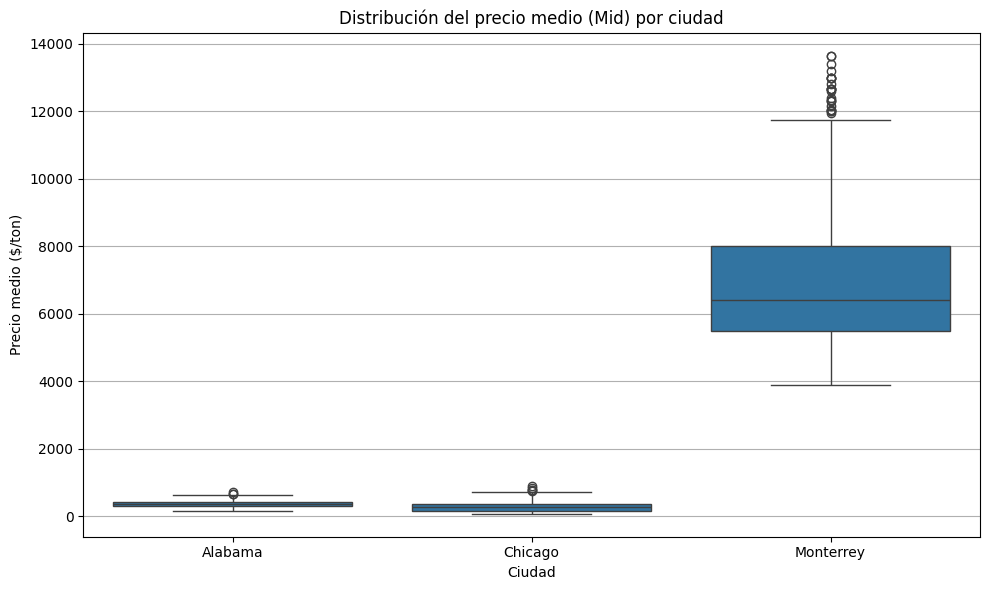

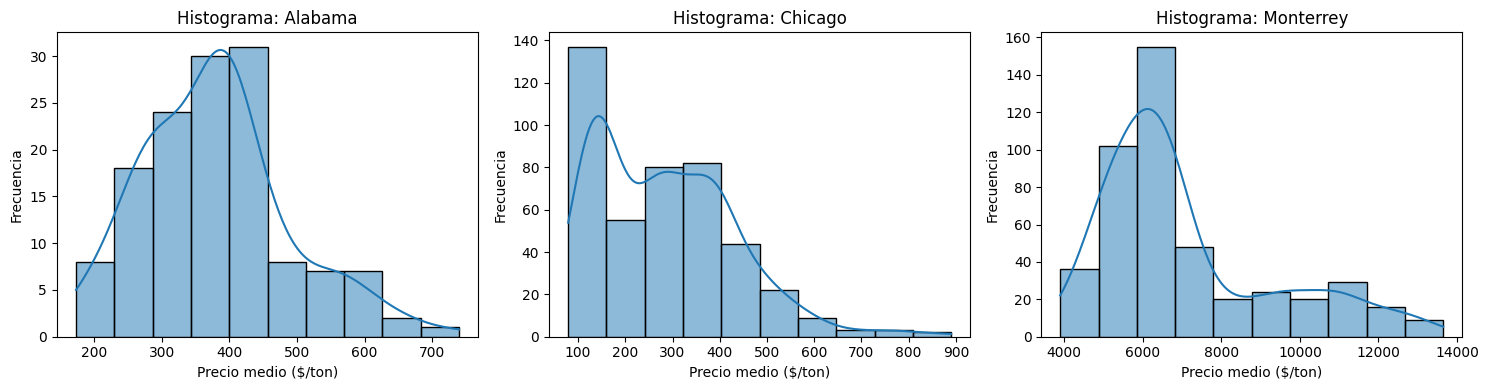

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos un DataFrame unificado con etiquetas de ciudad
alabama_df = pd.read_excel("Busheling No1 Alabama.xlsx", header=10)
chicago_df = pd.read_excel("Busheling No1 Chicago.xlsx", header=10)
monterrey_df = pd.read_excel("COPYOF~1.XLS", header=10)

# Limpiar y preparar datos
def preparar(df, ciudad):
    df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce', dayfirst=True)
    for col in ["Low", "Mid", "High", "Mid Change %"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df["Ciudad"] = ciudad
    return df.dropna(subset=["Low", "Mid", "High"])

alabama = preparar(alabama_df, "Alabama")
chicago = preparar(chicago_df, "Chicago")
monterrey = preparar(monterrey_df, "Monterrey")
df_todo = pd.concat([alabama, chicago, monterrey], ignore_index=True)
# BOXPLOTS
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_todo, x="Ciudad", y="Mid")
plt.title("Distribución del precio medio (Mid) por ciudad")
plt.ylabel("Precio medio ($/ton)")
plt.xlabel("Ciudad")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# HISTOGRAMAS
plt.figure(figsize=(15, 4))
for i, ciudad in enumerate(["Alabama", "Chicago", "Monterrey"]):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_todo[df_todo["Ciudad"] == ciudad]["Mid"], kde=True, bins=10)
    plt.title(f"Histograma: {ciudad}")
    plt.xlabel("Precio medio ($/ton)")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()